# Simulación de Particulas - Proyecto 1 

Como científico(a) de la computación usted es contratado para diseñar y desarrollar un motor de física que permita simular sistemas de partículas para animar y visualizar diferentes fenómenos físicos, incluyendo: caída libre, caída en sustancias viscosas, fuerzas de resortes, y rebotes de partículas.
Diseñe, desarrolle y construya del motor de física y construya un reporte que incluya:

1.	Introducción. Defina el problema y el trabajo previo realizado para abordar este problema.

2.	Materiales y métodos. Describa el modelo matemático-físico utilizado, el modelo numérico utilizado para solucionar el problema, y las herramientas computacionales utilizadas para realizar la animación.

3.	Resultados. Muestre algunos ejemplos de las simulaciones construidas y comente los resultados.

4.	Conclusiones. Concluya sobre su trabajo


El reporte debe entregarse como en un notebook.


# Introduction

To solve this problem, we're using `matplotlib` animation tools, as well as some basic knowledge of Netwon's Motion physics.

In [3]:
%matplotlib notebook
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
from matplotlib import animation, rc

def animateParticle (animation_function, init_function, time_in_seconds = 4, fps = 30):
    # Initialized plot Figure (fig) and Axes (ax)
    fig, ax = plt.subplots()

    ax.set_xlim((-20, 20))
    ax.set_ylim((0, 100))

    line1, = ax.plot([], [], lw = 5)

    init = lambda: init_function(line1)
    animate = lambda i: animation_function(i / fps, line1)
    anim = animation.FuncAnimation(fig, 
                               animate,
                               init_func = init,
                               frames = time_in_seconds * fps, interval = 1000 / fps,
                               blit = True)
    
    return anim

## Free Fall

A free fall for a particle is defined by an initial height $h$ and the current height is $y$, defined as:

$y = h + \frac{1}{2}gt^2$,

Where $g \approx -9.82 \frac{m}{s^2}$, the approximate acceleration of earth gravity, and $t$ is an independent variable, representing time.

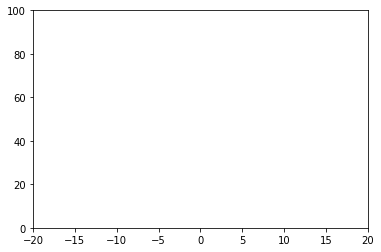

In [4]:
def init(line1):
  line1.set_data([0, 0], [150, 0 + 0.2])
  return (line1, )

h = 100
g = -9.82

def animate(t, line1):
    y = h + (1/2 * g * t ** 2)

    line1.set_data([0, 0], [y, y + 0.2])
    return (line1, )

anim = animateParticle(animate, init)

rc('animation', html='jshtml')
anim

# Recursos

- Baraff, Witkin and Kass “Physically based Animation Course
notes C. Particle Systems” – Siggraph 2001 - https://www.pixar.com/assets/pbm2001/index.html


